In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
import starspot as ss
from matplotlib.patches import Rectangle

### Info:
1. The line for saving each final plot has been commented out.
2. All paths in cell 2 should be changed to your machine.
3. Data files needed:
- bls period array for each target
- bls power array for each target
- sector light curve for each target
- rf1 training set df
- rf2 training set df
- rf3 training set df

In [2]:
#load data paths & dfs

#data paths
secpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_lc.fits'#.format(tic,sec)
blsxpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_bls_pg_period.npy'#.format(tic,sec)
blsypath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_bls_pg_power.npy'#.format(tic,sec)
#open data of train sets per model
rf1_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')#includes ncvz google df & tois in rf2
rf2_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
#cut dfs into training categories
variable = rf1_train[rf1_train['CLASS']==1]
flat = rf1_train[rf1_train['CLASS']==5]
yestransit = rf2_train[rf2_train['CLASS']==3]
notransit = rf2_train[rf2_train['CLASS']==1]
accurate = rf3_train[rf3_train['Label']==3]
inaccurate = rf3_train[rf3_train['Label']==1]
#save path for final figures
savepath = '/Volumes/Seagate-stars/Final_Run/Plots/LC_examples'

In [3]:
#dropping duplicates from each example type

#rf2
print('RF1 - before dropping duplicates (total,variable, flat):',len(rf1_train),len(variable),len(flat),'\nAfter dropping duplicates:')
rf1_solos = rf1_train.drop_duplicates(subset=['TIC','Sector'])
var_solos = rf1_solos[rf1_solos['CLASS']==1]
flat_solos = rf1_solos[rf1_solos['CLASS']==5]
print('rf1 total:',len(rf1_solos), 'transits:',len(var_solos),'no transits:', len(flat_solos))

#rf2
print('\nRF2 - before dropping duplicates (total,yes transits, no transits):',len(rf2_train),len(yestransit),len(notransit),'\nAfter dropping duplicates:')
rf2_solos = rf2_train.drop_duplicates(subset=['TIC','Sector'])
yes_solos = rf2_solos[rf2_solos['CLASS']==3]
no_solos = rf2_solos[rf2_solos['CLASS']==1]
print('rf2 total:',len(rf2_solos), 'transits:',len(yes_solos),'no transits:', len(no_solos))

#rf3
print('\nRF3 - before dropping duplicates (total,inacc, acc):',len(rf3_train),len(inaccurate),len(accurate),'\nAfter dropping duplicates:')
rf3_solos = rf3_train.drop_duplicates(subset=['TIC','Sector'])
acc_solos = rf3_solos[rf3_solos['Label']==3]
inacc_solos = rf3_solos[rf3_solos['Label']==1]
print('rf3 total:',len(rf3_solos),'accurate', len(acc_solos), 'inaccurate:',len(inacc_solos))

RF1 - before dropping duplicates (total,variable, flat): 3050 2351 699 
After dropping duplicates:
rf1 total: 2971 transits: 2272 no transits: 699

RF2 - before dropping duplicates (total,yes transits, no transits): 3308 958 2350 
After dropping duplicates:
rf2 total: 3034 transits: 763 no transits: 2271

RF3 - before dropping duplicates (total,inacc, acc): 2390 1138 1252 
After dropping duplicates:
rf3 total: 2390 accurate 1252 inaccurate: 1138


# Variable VS Flat

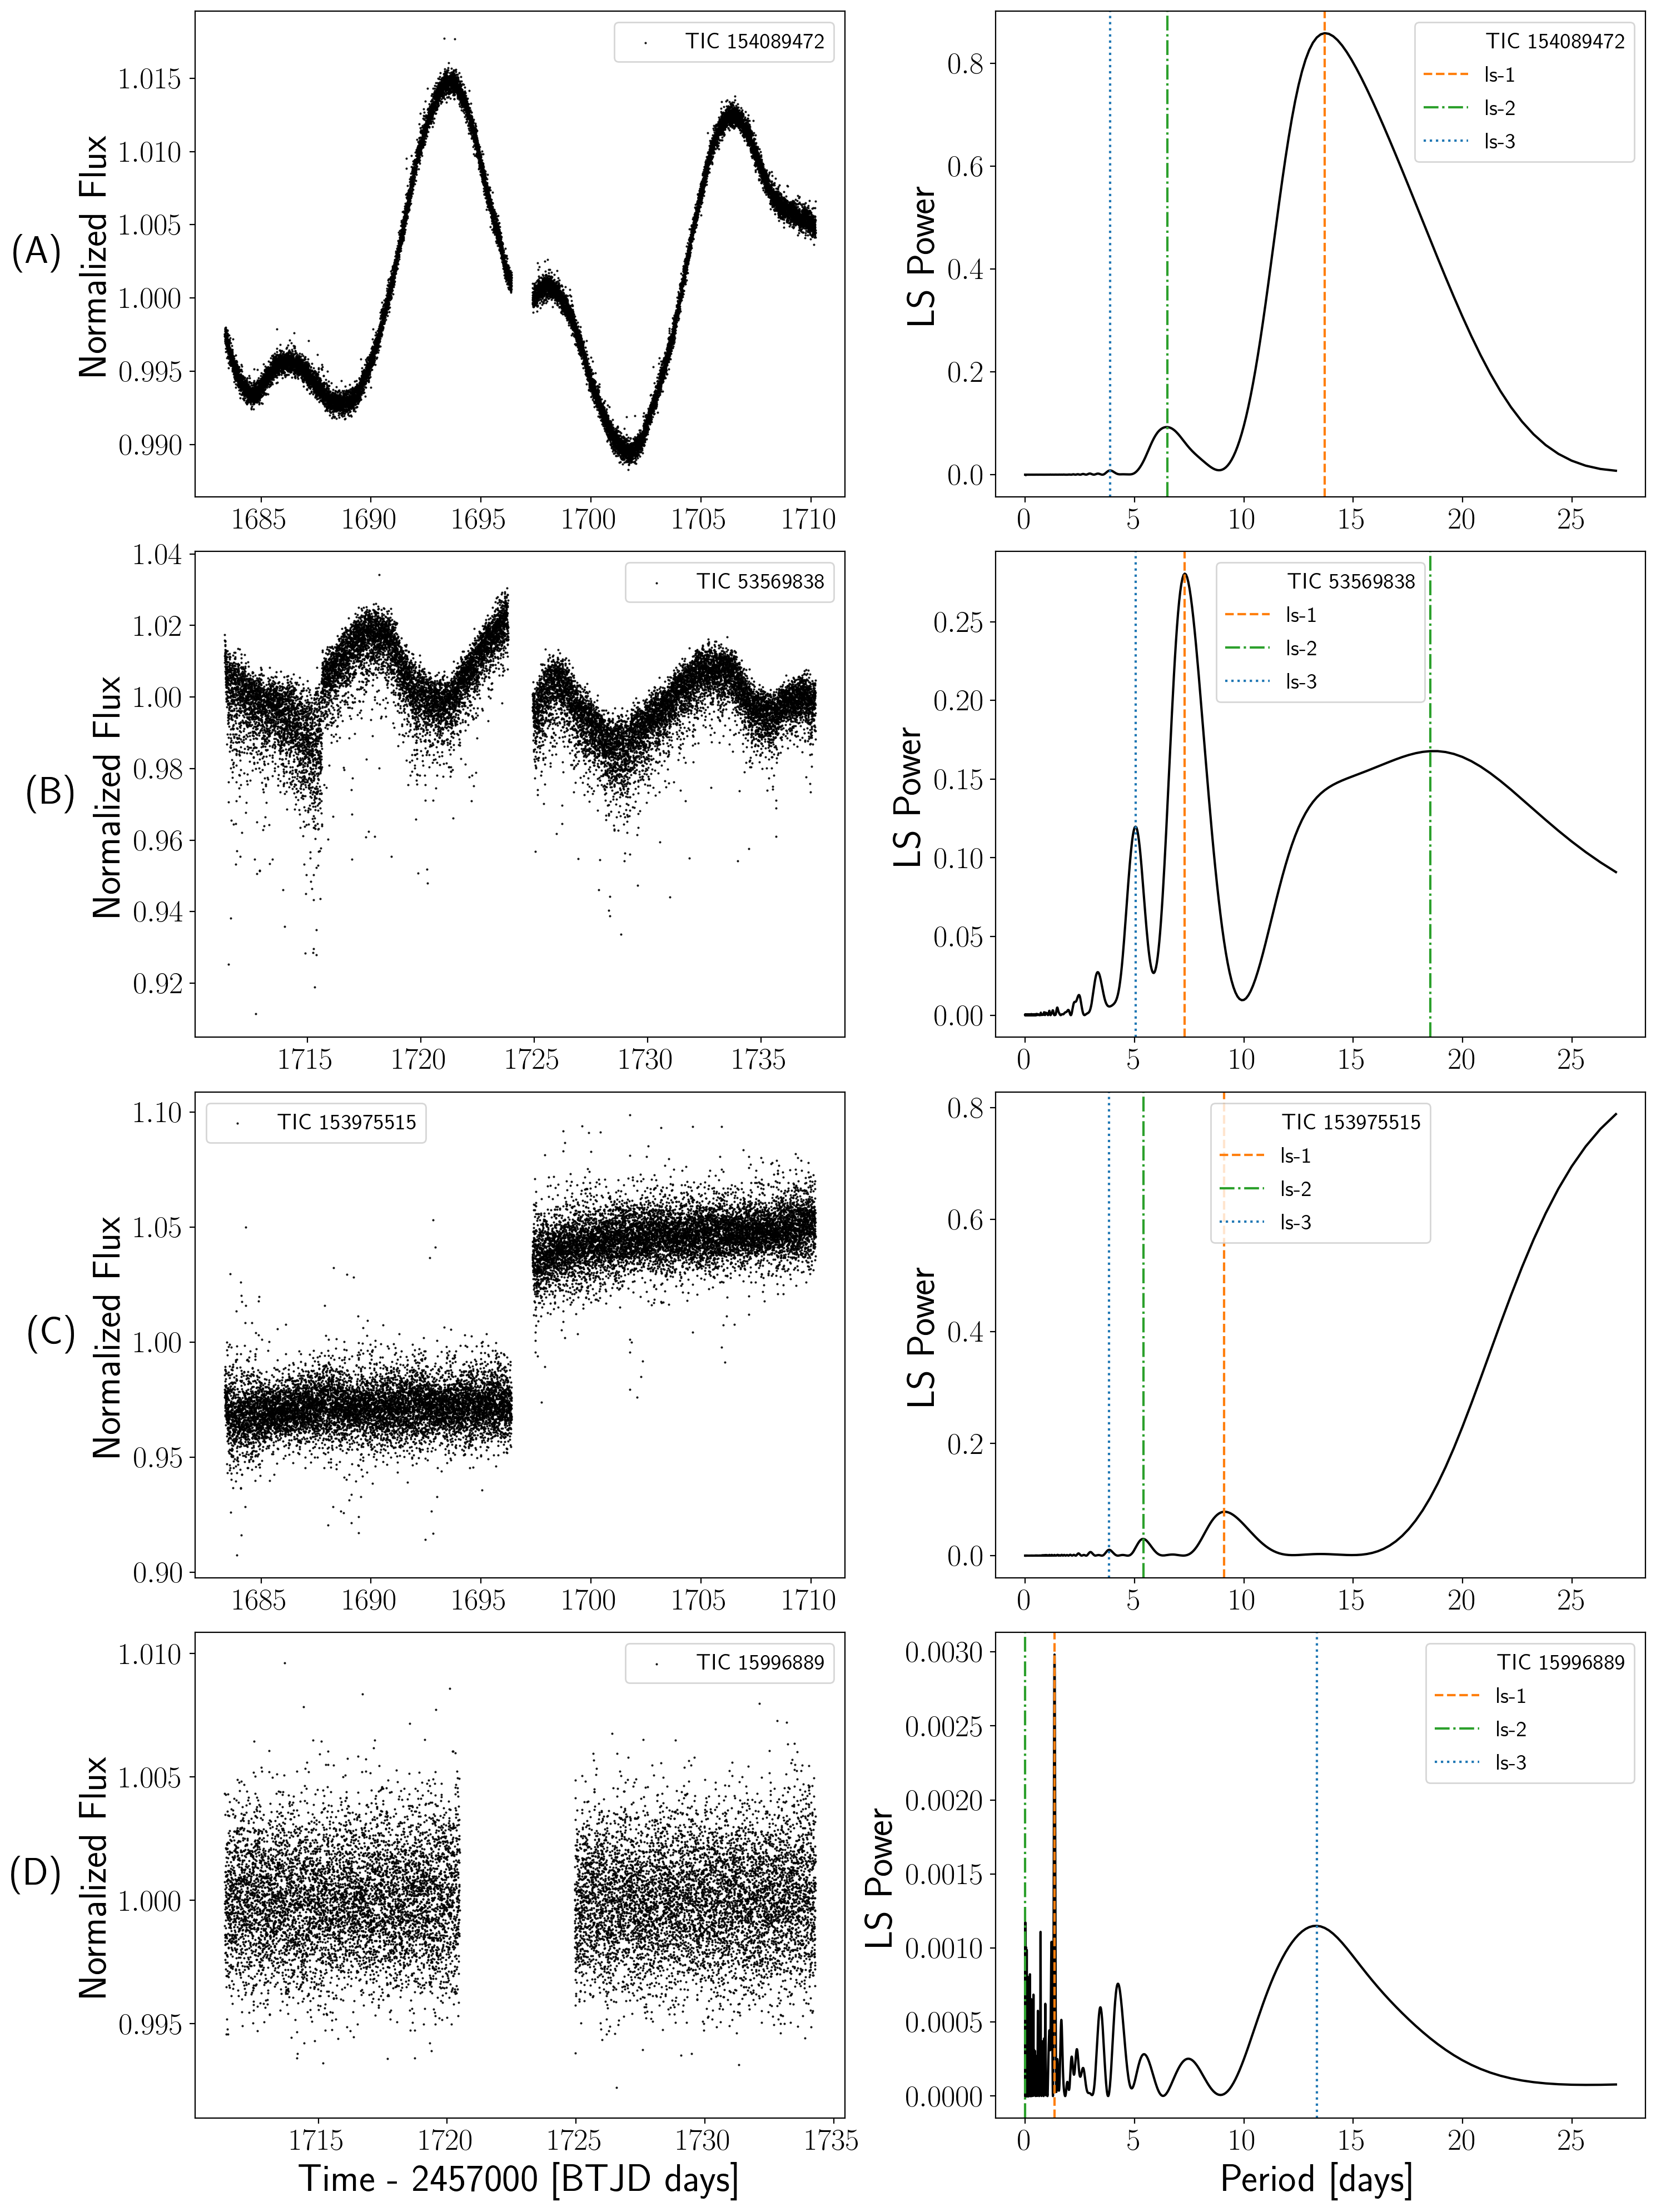

In [4]:
#final plot

#get data for sector lcs & periodograms
  
## variable target NUMBER ONE
variable_tic =  154089472 
variable_sec = '14'
#open lc data to plot
variable_lcf = lk.open(secpath.format(variable_tic,variable_sec))
variable_lc = variable_lcf.FLUX
#run ls
variable_rotate = ss.RotationModel(variable_lc.time, variable_lc.flux, variable_lc.flux_err) #test if works with flux_err=None or need if/else
variable_ls_period = variable_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
variable_pg_powers = variable_rotate.power
variable_freq = variable_rotate.freq
variable_pg_periods = 1./variable_freq
#df for amps
variable_df = variable[(variable['TIC']==variable_tic) & (variable['Sector']==variable_sec)]
variable_rp1 = variable_df['ls-1'].to_numpy()[0]
variable_rp2 = variable_df['ls-2'].to_numpy()[0]
variable_rp3 = variable_df['ls-3'].to_numpy()[0]

## variable target NUMBER TWO
variable2_tic =  53569838    
variable2_sec = '15' 
#open lc data to plot
variable2_lcf = lk.open(secpath.format(variable2_tic,variable2_sec))
variable2_lc = variable2_lcf.FLUX
#run ls
variable2_rotate = ss.RotationModel(variable2_lc.time, variable2_lc.flux, variable2_lc.flux_err) #test if works with flux_err=None or need if/else
variable2_ls_period = variable2_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
variable2_pg_powers = variable2_rotate.power
variable2_freq = variable2_rotate.freq
variable2_pg_periods = 1./variable2_freq
#df for amps
variable2_df = variable[(variable['TIC']==variable2_tic) & (variable['Sector']==variable2_sec)]
variable2_rp1 = variable2_df['ls-1'].to_numpy()[0]
variable2_rp2 = variable2_df['ls-2'].to_numpy()[0]
variable2_rp3 = variable2_df['ls-3'].to_numpy()[0]

## flat target NUMBER ONE
flat_tic = 153975515 
flat_sec = '14'
#open lc data to plot
flat_lcf = lk.open(secpath.format(flat_tic,flat_sec))
flat_lc = flat_lcf.FLUX
#run ls
flat_rotate = ss.RotationModel(flat_lc.time, flat_lc.flux, flat_lc.flux_err) #test if works with flux_err=None or need if/else
flat_ls_period = flat_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
flat_pg_powers = flat_rotate.power
flat_freq = flat_rotate.freq
flat_pg_periods = 1./flat_freq
#df for amps
flat_df = flat[(flat['TIC']==flat_tic) & (flat['Sector']==flat_sec)]
flat_rp1 = flat_df['ls-1'].to_numpy()
flat_rp2 = flat_df['ls-2'].to_numpy()
flat_rp3 = flat_df['ls-3'].to_numpy()

## flat target NUMBER TWO
flat2_tic = 15996889 
flat2_sec = '15'
#open lc data to plot
flat2_lcf = lk.open(secpath.format(flat2_tic,flat2_sec))
flat2_lc = flat2_lcf.FLUX
#run ls
flat2_rotate = ss.RotationModel(flat2_lc.time, flat2_lc.flux, flat2_lc.flux_err) #test if works with flux_err=None or need if/else
flat2_ls_period = flat2_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
flat2_pg_powers = flat2_rotate.power
flat2_freq = flat2_rotate.freq
flat2_pg_periods = 1./flat2_freq
#df for amps
flat2_df = flat[(flat['TIC']==flat2_tic) & (flat['Sector']==flat2_sec)]
flat2_rp1 = flat2_df['ls-1'].to_numpy()
flat2_rp2 = flat2_df['ls-2'].to_numpy()
flat2_rp3 = flat2_df['ls-3'].to_numpy()

# plot sector lcs & periodograms
#lcs
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8])  = plt.subplots(4,2, figsize=(15,20),dpi=200)
ax1.scatter(variable_lc.time,variable_lc.flux,s=.2,color='k',label = 'TIC {}'.format(variable_tic),rasterized=True)
ax1.set_ylabel('Normalized Flux')
ax1.legend(fontsize='x-large')

ax5.scatter(flat_lc.time,flat_lc.flux,s=.2,color='k',label = 'TIC {}'.format(flat_tic),rasterized=True)
ax5.set_ylabel('Normalized Flux')
ax5.legend(fontsize='x-large')

ax3.scatter(variable2_lc.time,variable2_lc.flux,s=.2,color='k',label = 'TIC {}'.format(variable2_tic),rasterized=True)
ax3.set_ylabel('Normalized Flux')
ax3.legend(fontsize='x-large')

ax7.scatter(flat2_lc.time,flat2_lc.flux,s=.2,color='k',label = 'TIC {}'.format(flat2_tic),rasterized=True)
ax7.set_ylabel('Normalized Flux')
ax7.set_xlabel('Time - 2457000 [BTJD days]')
ax7.legend(fontsize='x-large')


#pgs
ax2.plot(variable_pg_periods,variable_pg_powers,color='k')
var1_1 = ax2.axvline(variable_rp1,ls='dashed',color='C1', label='ls-1')
var1_2 = ax2.axvline(variable_rp2,ls='dashdot',color='C2', label='ls-2')
var1_3 = ax2.axvline(variable_rp3,ls='dotted', label='ls-3')
ax2.set_ylabel('LS Power')
extravar1_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax2.legend([extravar1_1, var1_1, var1_2, var1_3], ('TIC {}'.format(variable_tic), "ls-1", "ls-2", "ls-3"),fontsize='x-large')

ax6.plot(flat_pg_periods,flat_pg_powers,color='k')
flat1_1 = ax6.axvline(flat_rp1,ls='dashed',color='C1', label='ls-1')
flat1_2 = ax6.axvline(flat_rp2,ls='dashdot',color='C2', label='ls-2')
flat1_3 = ax6.axvline(flat_rp3,ls='dotted', label='ls-3')
ax6.set_ylabel('LS Power')
extraflat1_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax6.legend([extraflat1_1, flat1_1, flat1_2, flat1_3], ('TIC {}'.format(flat_tic), "ls-1", "ls-2", "ls-3"),fontsize='x-large')

ax4.plot(variable2_pg_periods,variable2_pg_powers,color='k')
var2_1 = ax4.axvline(variable2_rp1,ls='dashed',color='C1', label='ls-1')
var2_2 = ax4.axvline(variable2_rp2,ls='dashdot',color='C2', label='ls-2')
var2_3 = ax4.axvline(variable2_rp3,ls='dotted', label='ls-3')
ax4.set_ylabel('LS Power')
extravar2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax4.legend([extravar2_1, var2_1, var2_2, var2_3], ('TIC {}'.format(variable2_tic), "ls-1", "ls-2", "ls-3"),fontsize='x-large')

ax8.plot(flat2_pg_periods,flat2_pg_powers,color='k')
flat2_1 = ax8.axvline(flat2_rp1,ls='dashed',color='C1', label='ls-1')
flat2_2 = ax8.axvline(flat2_rp2,ls='dashdot',color='C2', label='ls-2')
flat2_3 = ax8.axvline(flat2_rp3,ls='dotted', label='ls-3')
ax8.set_ylabel('LS Power')
ax8.set_xlabel('Period [days]');
extraflat2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax8.legend([extraflat2_1, flat2_1, flat2_2, flat2_3], ('TIC {}'.format(flat2_tic), "ls-1", "ls-2", "ls-3"),fontsize='x-large')

#adds labels for rows so easier to reference than tic numbers
pad = 5 # in points
rows = ['({})'.format(row) for row in ['A', 'B', 'C', 'D']]
axes = [ax1,ax3,ax5,ax7]
for ax, row in zip(axes, rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center',fontsize=25)

plt.tight_layout()


# plt.savefig('{}/RF-1_lcexamples.png'.format(savepath))



# Transit vs NO Transit

In [5]:
#get data for sector lcs & periodograms

## yes transit target NUMBER ONE
yes_tic = 230114503 #clear EB
yes_sec = '14'
#open lc data to plot
yes_lcf = lk.open(secpath.format(yes_tic,yes_sec))
yes_lc = yes_lcf.FLUX
#run ls
yes_rotate = ss.RotationModel(yes_lc.time, yes_lc.flux, yes_lc.flux_err) #test if works with flux_err=None or need if/else
yes_ls_period = yes_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
yes_pg_powers = yes_rotate.power
yes_freq = yes_rotate.freq
yes_pg_periods = 1./yes_freq
#df for amps
yes_df = yestransit[(yestransit['TIC']==yes_tic) & (yestransit['Sector']==yes_sec)]
yes_rp1 = yes_df['ls-1'].to_numpy()
yes_rp2 = yes_df['ls-2'].to_numpy()
yes_rp3 = yes_df['ls-3'].to_numpy()
yes_amp1 = yes_df['lsamp-1'].to_numpy()
yes_amp2 = yes_df['lsamp-2'].to_numpy()
yes_amp3 = yes_df['lsamp-3'].to_numpy()


## yes transit target NUMBER TWO
yes2_tic =  199688472 #planet toi
yes2_sec = '15'
#open lc data to plot
yes2_lcf = lk.open(secpath.format(yes2_tic,yes2_sec))
yes2_lc = yes2_lcf.FLUX
#run ls
yes2_rotate = ss.RotationModel(yes2_lc.time, yes2_lc.flux, yes2_lc.flux_err) #test if works with flux_err=None or need if/else
yes2_ls_period = yes2_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
yes2_pg_powers = yes2_rotate.power
yes2_freq = yes2_rotate.freq
yes2_pg_periods = 1./yes2_freq
#df for amps
yes2_df = yestransit[(yestransit['TIC']==yes2_tic) & (yestransit['Sector']==yes2_sec)]
yes2_rp1 = yes2_df['ls-1'].to_numpy()[0]
yes2_rp2 = yes2_df['ls-2'].to_numpy()[0]
yes2_rp3 = yes2_df['ls-3'].to_numpy()[0]
yes2_amp1 = yes2_df['lsamp-1'].to_numpy()[0]
yes2_amp2 = yes2_df['lsamp-2'].to_numpy()[0]
yes2_amp3 = yes2_df['lsamp-3'].to_numpy()[0]

## no transit target NUMBER ONE
no_tic = 47579336
no_sec = '14'
#open lc data to plot
no_lcf = lk.open(secpath.format(no_tic,no_sec))
no_lc = no_lcf.FLUX
#run ls
no_rotate = ss.RotationModel(no_lc.time, no_lc.flux, no_lc.flux_err) #test if works with flux_err=None or need if/else
no_ls_period = no_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
no_pg_powers = no_rotate.power
no_freq = no_rotate.freq
no_pg_periods = 1./no_freq
#df for amps
no_df = notransit[(notransit['TIC']==no_tic) & (notransit['Sector']==no_sec)]
no_rp1 = no_df['ls-1'].to_numpy()[0]
no_rp2 = no_df['ls-2'].to_numpy()[0]
no_rp3 = no_df['ls-3'].to_numpy()[0]
no_amp1 = no_df['lsamp-1'].to_numpy()[0]
no_amp2 = no_df['lsamp-2'].to_numpy()[0]
no_amp3 = no_df['lsamp-3'].to_numpy()[0]

## no transit target NUMBER TWO
no2_tic = 16736869
no2_sec = '15'
#open lc data to plot
no2_lcf = lk.open(secpath.format(no2_tic,no2_sec))
no2_lc = no2_lcf.FLUX
#run ls
no2_rotate = ss.RotationModel(no2_lc.time, no2_lc.flux, no2_lc.flux_err) #test if works with flux_err=None or need if/else
no2_ls_period = no2_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
no2_pg_powers = no2_rotate.power
no2_freq = no2_rotate.freq
no2_pg_periods = 1./no2_freq
#df for amps
no2_df = notransit[(notransit['TIC']==no2_tic) & (notransit['Sector']==no2_sec)]
no2_rp1 = no2_df['ls-1'].to_numpy()
no2_rp2 = no2_df['ls-2'].to_numpy()
no2_rp3 = no2_df['ls-3'].to_numpy()
no2_amp1 = no2_df['lsamp-1'].to_numpy()
no2_amp2 = no2_df['lsamp-2'].to_numpy()
no2_amp3 = no2_df['lsamp-3'].to_numpy()

## bls yes/no first targets
yes_blsx = np.load(blsxpath.format(yes_tic,yes_sec))
yes_blsy = np.load(blsypath.format(yes_tic,yes_sec))
no_blsx = np.load(blsxpath.format(no_tic,no_sec))
no_blsy = np.load(blsypath.format(no_tic,no_sec))
## bls yes/no second targets
yes2_blsx = np.load(blsxpath.format(yes2_tic,yes2_sec))
yes2_blsy = np.load(blsypath.format(yes2_tic,yes2_sec))
no2_blsx = np.load(blsxpath.format(no2_tic,no2_sec))
no2_blsy = np.load(blsypath.format(no2_tic,no2_sec))




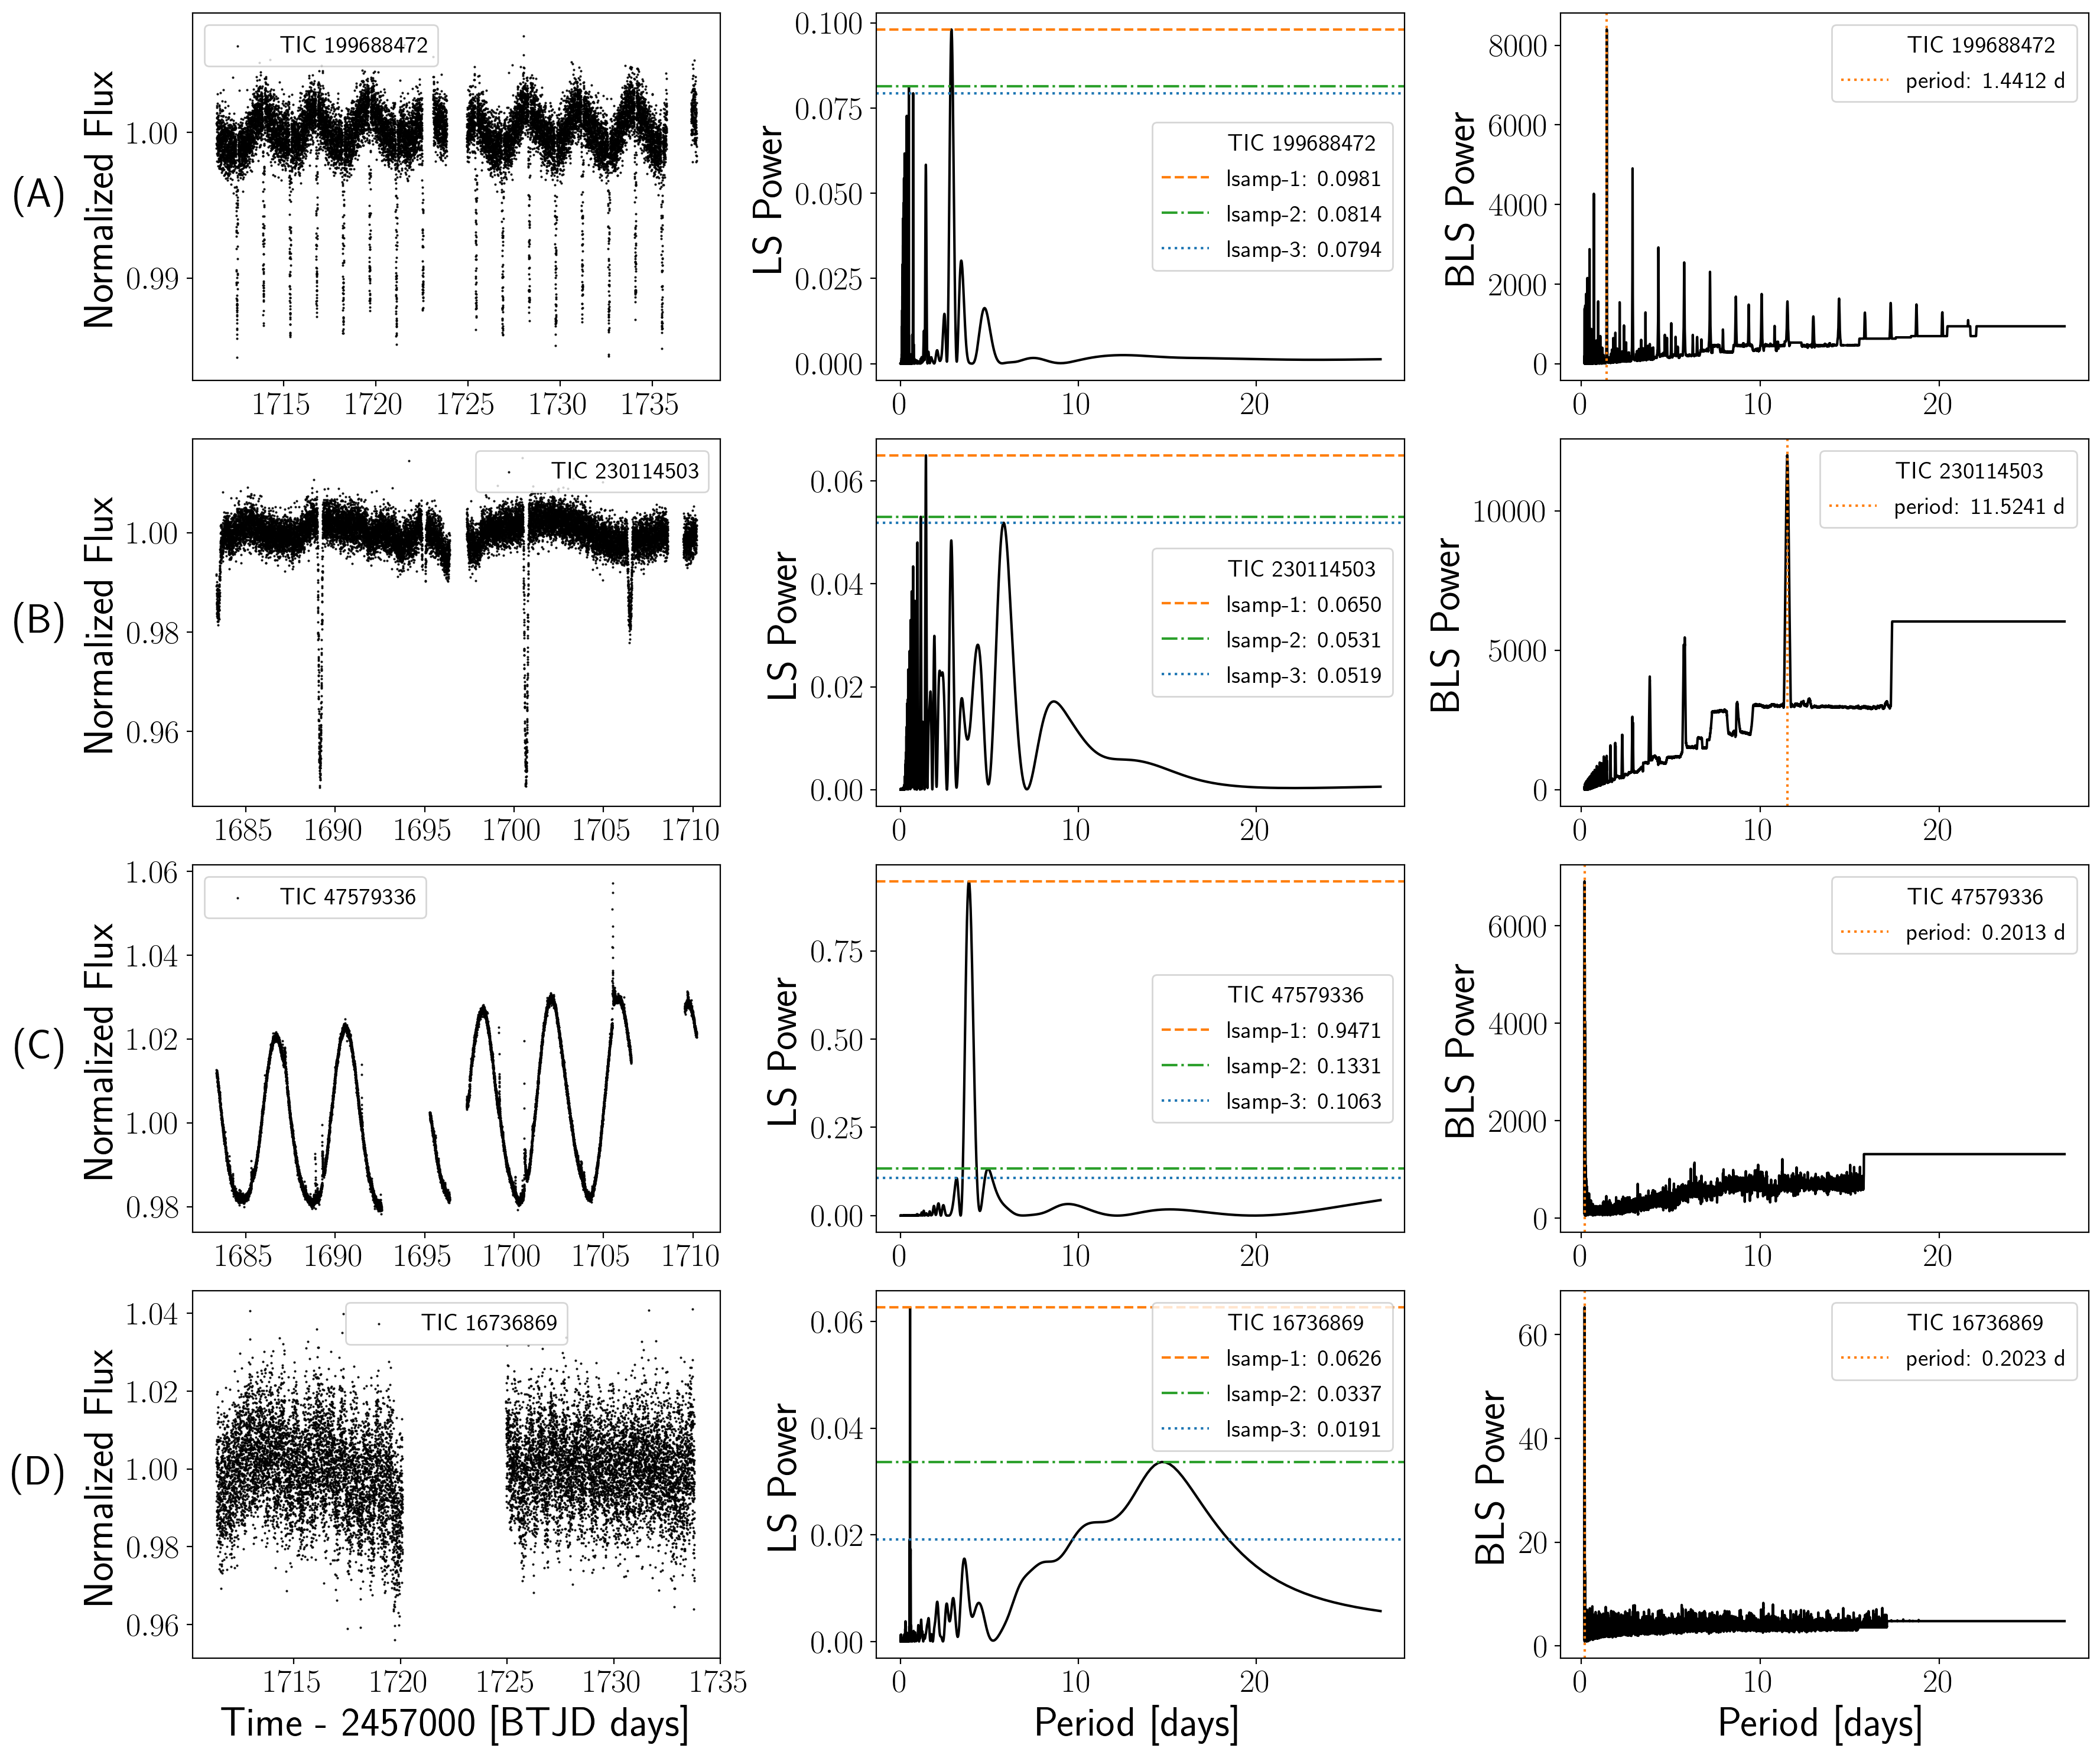

In [6]:
#final plot

## yes number two----199688472(planet)
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12])  = plt.subplots(4,3, figsize=(18,15),dpi=200)
#lc
ax1.scatter(yes2_lc.time,yes2_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes2_tic),rasterized=True)
ax1.set_ylabel('Normalized Flux')
ax1.legend(fontsize='x-large')
ax1.set_xticks(ticks=([1715,1720,1725,1730,1735]))#,labels=['1715','1720','1725','1730'])
#ls
ax2.plot(yes2_pg_periods,yes2_pg_powers,color='k')
yes2_1 = ax2.axhline(yes2_amp1,ls='dashed',color='C1', label='lsamp-1')
yes2_2 = ax2.axhline(yes2_amp2,ls='dashdot',color='C2', label='lsamp-2')
yes2_3 = ax2.axhline(yes2_amp3,ls='dotted', label='lsamp-3')
ax2.set_ylabel('LS Power')
extrayes2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax2.legend([extrayes2_1, yes2_1, yes2_2, yes2_3], ('TIC {}'.format(yes2_tic),
            'lsamp-1: {}'.format("%.4f" % yes2_amp1),'lsamp-2: {}'.format("%.4f" % yes2_amp2), 'lsamp-3: {}'.format("%.4f" % yes2_amp3) ),
           fontsize='x-large')
#bls
ax3.plot(yes2_blsx,yes2_blsy,color='k')
ax3.set_ylabel('BLS Power')
legendyes2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
yes2_1b = ax3.axvline(yes2_blsx[np.where(yes2_blsy==np.max(yes2_blsy))],ls="dotted",color='C1',label='period')
ax3.legend([legendyes2_1, yes2_1b], ('TIC {}'.format(yes2_tic),
            'period: {} d'.format("%.4f" % yes2_blsx[np.where(yes2_blsy==np.max(yes2_blsy))])), fontsize='x-large')


## yes number one----230114503(eb)
#lc
ax4.scatter(yes_lc.time,yes_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes_tic),rasterized=True)
ax4.set_ylabel('Normalized Flux')
ax4.legend(fontsize='x-large')
ax4.set_xticks(ticks=([1685,1690,1695,1700,1705,1710]))
#pgs
ax5.plot(yes_pg_periods,yes_pg_powers,color='k')
yes_1 = ax5.axhline(yes_amp1,ls='dashed',color='C1', label='lsamp-1: {}'.format("%.2f" % yes_amp1))
yes_2 = ax5.axhline(yes_amp2,ls='dashdot',color='C2', label='lsamp-2: {}'.format("%.2f" % yes_amp2))
yes_3 = ax5.axhline(yes_amp3,ls='dotted', label='lsamp-3: {}'.format("%.2f" % yes_amp3))
ax5.set_ylabel('LS Power')
extrayes_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax5.legend([extrayes_1, yes_1, yes_2, yes_3], ('TIC {}'.format(yes_tic),
            'lsamp-1: {}'.format("%.4f" % yes_amp1),'lsamp-2: {}'.format("%.4f" % yes_amp2), 'lsamp-3: {}'.format("%.4f" % yes_amp3) ),
           fontsize='x-large')
#bls
ax6.plot(yes_blsx,yes_blsy,color='k')
ax6.set_ylabel('BLS Power')
# ax6.text(27.5, 11600, 'TIC {}'.format(yes_tic) ,horizontalalignment='right',verticalalignment='top',fontsize='x-large')
legendyes_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
yes_1b = ax6.axvline(yes_blsx[np.where(yes_blsy==np.max(yes_blsy))],ls="dotted",color='C1',label='period')
ax6.legend([legendyes_1, yes_1b], ('TIC {}'.format(yes_tic),
            'period: {} d'.format("%.4f" % yes_blsx[np.where(yes_blsy==np.max(yes_blsy))])), fontsize='x-large')


## no number one---47579336
#lcs
ax7.scatter(no_lc.time,no_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no_tic),rasterized=True)
ax7.set_ylabel('Normalized Flux')
ax7.legend(fontsize='x-large')
ax7.set_xticks(ticks=([1685,1690,1695,1700,1705,1710]))
#ls
ax8.plot(no_pg_periods,no_pg_powers,color='k')
no_1 = ax8.axhline(no_amp1,ls='dashed',color='C1', label='lsamp-1')
no_2 = ax8.axhline(no_amp2,ls='dashdot',color='C2', label='lsamp-2')
no_3 = ax8.axhline(no_amp3,ls='dotted', label='lsamp-3')
ax8.set_ylabel('LS Power')
extrano_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax8.legend([extrano_1, no_1, no_2, no_3], ('TIC {}'.format(no_tic),
            'lsamp-1: {}'.format("%.4f" % no_amp1),'lsamp-2: {}'.format("%.4f" % no_amp2), 'lsamp-3: {}'.format("%.4f" % no_amp3) ),
           fontsize='x-large')
#bls
ax9.plot(no_blsx,no_blsy,color='k')
ax9.set_ylabel('BLS Power')
legendno_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
no_1b = ax9.axvline(no_blsx[np.where(no_blsy==np.max(no_blsy))],ls="dotted",color='C1',label='period')
ax9.legend([legendno_1, no_1b], ('TIC {}'.format(no_tic),
            'period: {} d'.format("%.4f" % no_blsx[np.where(no_blsy==np.max(no_blsy))])), fontsize='x-large')


## no number two --16736869
#lc
ax10.scatter(no2_lc.time,no2_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no2_tic),rasterized=True)
ax10.set_ylabel('Normalized Flux')
ax10.set_xlabel('Time - 2457000 [BTJD days]')
ax10.legend(fontsize='x-large')
ax10.set_xticks(ticks=([1715,1720,1725,1730,1735]))
#pgs
ax11.plot(no2_pg_periods,no2_pg_powers,color='k')
no2_1 = ax11.axhline(no2_amp1,ls='dashed',color='C1', label='lsamp-1')
no2_2 = ax11.axhline(no2_amp2,ls='dashdot',color='C2', label='lsamp-2')
no2_3 = ax11.axhline(no2_amp3,ls='dotted', label='lsamp-3')
ax11.set_ylabel('LS Power')
ax11.set_xlabel('Period [days]');
extrano2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax11.legend([extrano2_1, no2_1, no2_2, no2_3], ('TIC {}'.format(no2_tic),
            'lsamp-1: {}'.format("%.4f" % no2_amp1),'lsamp-2: {}'.format("%.4f" % no2_amp2), 'lsamp-3: {}'.format("%.4f" % no2_amp3) ),
           fontsize='x-large')
#bls
ax12.plot(no2_blsx,no2_blsy,color='k')
ax12.set_ylabel('BLS Power')
ax12.set_xlabel('Period [days]');
legendno2_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
no2_1b = ax12.axvline(no2_blsx[np.where(no2_blsy==np.max(no2_blsy))],ls="dotted",color='C1',label='period')
ax12.legend([legendno2_1, no2_1b], ('TIC {}'.format(no2_tic),
            'period: {} d'.format("%.4f" % no2_blsx[np.where(no2_blsy==np.max(no2_blsy))])), fontsize='x-large')

#add in row labels
pad = 5 # in points
rows = ['({})'.format(row) for row in ['A', 'B', 'C', 'D']]
axes = [ax1,ax4,ax7,ax10]
for ax, row in zip(axes, rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center',fontsize=25)


plt.tight_layout()


# plt.savefig('{}/RF-2_lcexamples.png'.format(savepath))


# Accurate VS Inaccurate

In [7]:
#get data for sector lcs & periodograms

## accurate target
accurate_tic = 120577867 #agreed with MQ rp 
accurate_sec = '14'
accurate_sec2 = '14.0'
#open lc data to plot
accurate_lcf = lk.open(secpath.format(accurate_tic,accurate_sec))
accurate_lc = accurate_lcf.FLUX
#run ls
accurate_rotate = ss.RotationModel(accurate_lc.time, accurate_lc.flux, accurate_lc.flux_err) #test if works with flux_err=None or need if/else
accurate_ls_period = accurate_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
accurate_pg_powers = accurate_rotate.power
accurate_freq = accurate_rotate.freq
accurate_pg_periods = 1./accurate_freq
#df for amps
accurate_df = accurate[(accurate['TIC']==accurate_tic) & (accurate['Sector']==accurate_sec2)]
accurate_rp1 = accurate_df['ls-1'].to_numpy()
accurate_rp2 = accurate_df['ls-2'].to_numpy()
accurate_rp3 = accurate_df['ls-3'].to_numpy()
acc_mq_rp = accurate_df['MQ_Prot'].to_numpy()
acc_mq_rp_10reltol = acc_mq_rp * .1 #10% tolerance
acc_mq_rp_range = [(acc_mq_rp - acc_mq_rp_10reltol), (acc_mq_rp + acc_mq_rp_10reltol)]


## inaccurate target
inaccurate_tic = 122447460 #mq that didnt match
inaccurate_sec = '14.0' 
inaccurate_sec2 = '14'
#open lc data to plot
inaccurate_lcf = lk.open(secpath.format(inaccurate_tic,inaccurate_sec2))
inaccurate_lc = inaccurate_lcf.FLUX
#run ls
inaccurate_rotate = ss.RotationModel(inaccurate_lc.time, inaccurate_lc.flux, inaccurate_lc.flux_err) #test if works with flux_err=None or need if/else
inaccurate_ls_period = inaccurate_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
inaccurate_pg_powers = inaccurate_rotate.power
inaccurate_freq = inaccurate_rotate.freq
inaccurate_pg_periods = 1./inaccurate_freq
#df for amps
inaccurate_df = inaccurate[(inaccurate['TIC']==inaccurate_tic) & (inaccurate['Sector']==inaccurate_sec)]
inaccurate_rp1 = inaccurate_df['ls-1'].to_numpy()
inaccurate_rp2 = inaccurate_df['ls-2'].to_numpy()
inaccurate_rp3 = inaccurate_df['ls-3'].to_numpy()
mq_rp = inaccurate_df['MQ_Prot'].to_numpy()
mq_rp_10reltol = mq_rp * .1 #10% tolerance
mq_rp_range = [(mq_rp - mq_rp_10reltol), (mq_rp + mq_rp_10reltol)]


/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


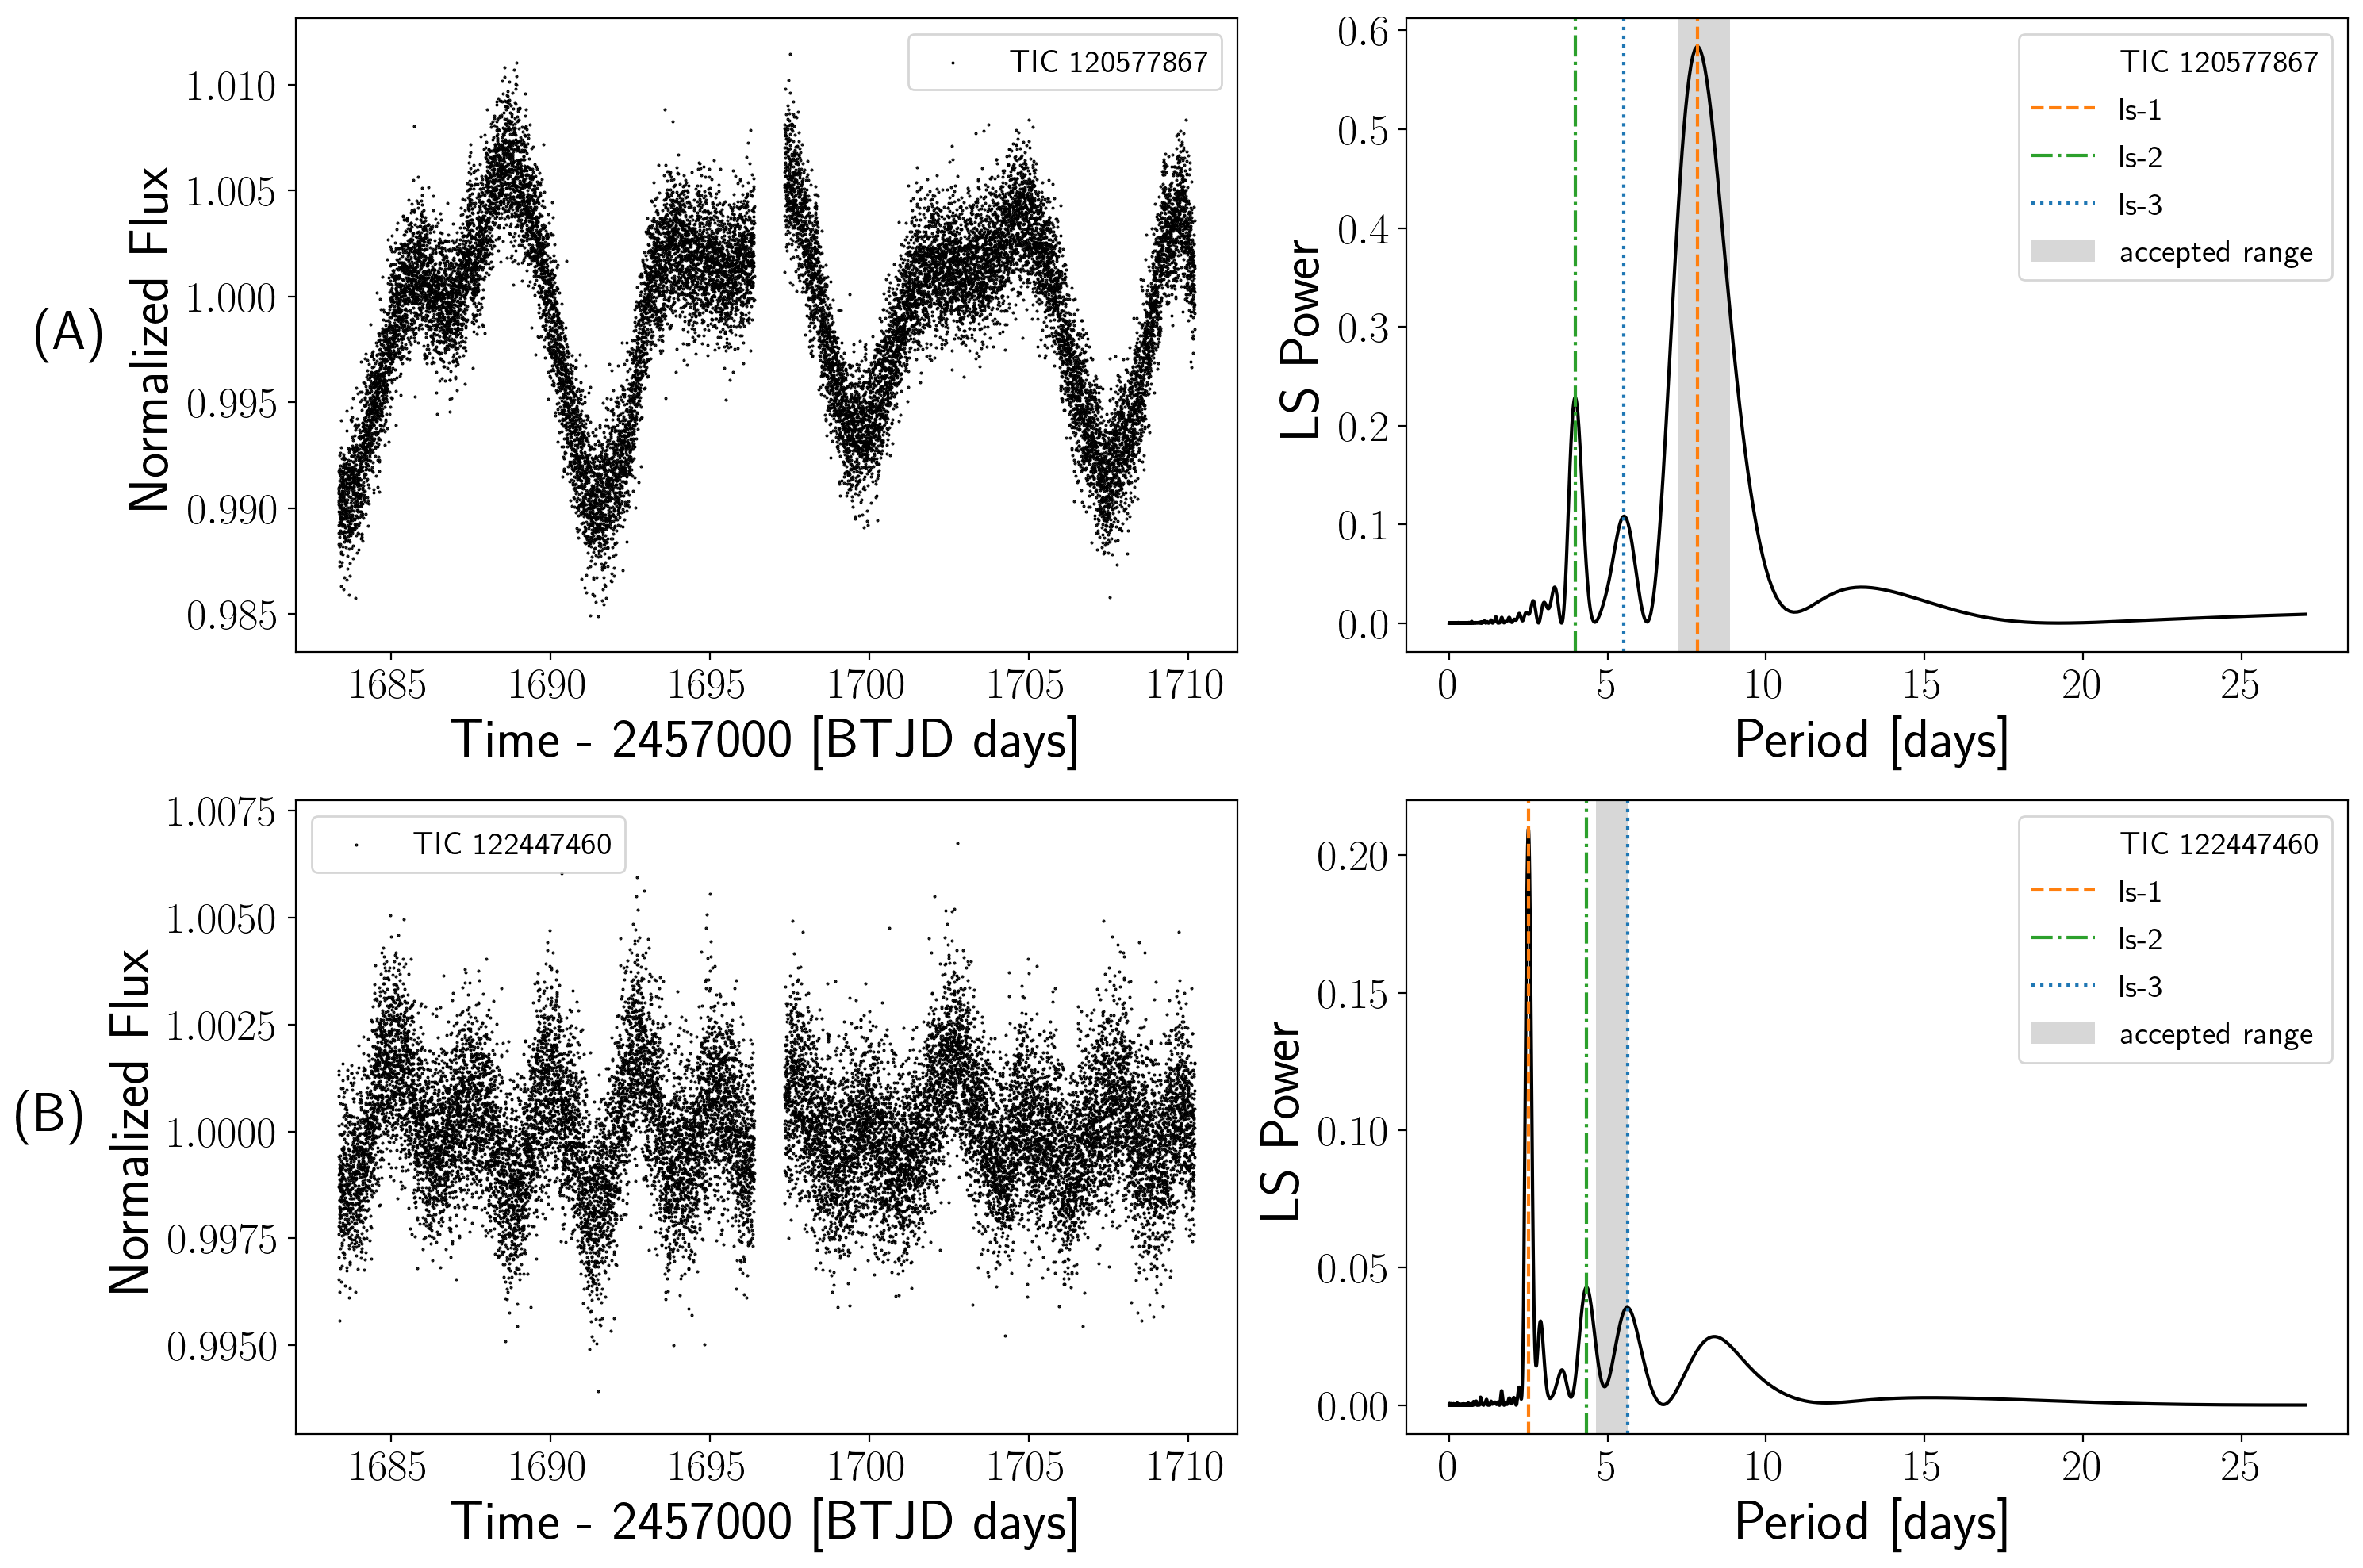

In [8]:
#final plot

#lcs
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
ax1.scatter(accurate_lc.time,accurate_lc.flux,s=.2,color='k',label = 'TIC {}'.format(accurate_tic),rasterized=True)
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')
ax3.scatter(inaccurate_lc.time,inaccurate_lc.flux,s=.2,color='k',label = 'TIC {}'.format(inaccurate_tic),rasterized=True)
ax3.set_ylabel('Normalized Flux')
ax3.set_xlabel('Time - 2457000 [BTJD days]')
ax3.legend(fontsize='x-large')

#pgs
ax2.plot(accurate_pg_periods,accurate_pg_powers,color='k')
one_acc = ax2.axvline(accurate_rp1,ls='dashed',color='C1', label='ls-1')
two_acc = ax2.axvline(accurate_rp2,ls='dashdot',color='C2', label='ls-2')
three_acc = ax2.axvline(accurate_rp3,ls='dotted', label='ls-3')
four_acc = ax2.axvspan(acc_mq_rp_range[0],acc_mq_rp_range[1],facecolor='lightgrey', alpha=0.9,label = 'accepted range')
ax2.legend(fontsize='x-large')
pg_acc = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax2.legend([pg_acc, one_acc, two_acc, three_acc, four_acc], ('TIC {}'.format(accurate_tic),
            'ls-1','ls-2', 'ls-3','accepted range' ),
           fontsize='x-large')
ax2.set_ylabel('LS Power')
ax2.set_xlabel('Period [days]');
ax4.plot(inaccurate_pg_periods,inaccurate_pg_powers,color='k')
one_inacc = ax4.axvline(inaccurate_rp1,ls='dashed',color='C1', label='ls-1')
two_inacc = ax4.axvline(inaccurate_rp2,ls='dashdot',color='C2', label='ls-2')
three_inacc = ax4.axvline(inaccurate_rp3,ls='dotted', label='ls-3')
four_inacc = ax4.axvspan(mq_rp_range[0],mq_rp_range[1],facecolor='lightgrey', alpha=0.9,label = 'accepted range')
pg_inacc = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax4.legend([pg_inacc, one_inacc, two_inacc, three_inacc,four_inacc], ('TIC {}'.format(inaccurate_tic),
            'ls-1','ls-2', 'ls-3','accepted range' ),
           fontsize='x-large')
ax4.set_ylabel('LS Power')
ax4.set_xlabel('Period [days]');

#add in row labels
pad = 5 # in points
rows = ['({})'.format(row) for row in ['A', 'B']]
axes = [ax1,ax3]
for ax, row in zip(axes, rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center',fontsize=25)

plt.tight_layout()

# plt.savefig('{}/RF-3_lcexamples.png'.format(savepath))--already saved